<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/ESAA_1129_Week13_Fri_Session_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [3]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [38]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
sales = pd.read_csv("/content/drive/MyDrive/ESAA/product_sales.csv")
print(sales.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [39]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [40]:
#모델 생성
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=200, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [41]:
pred = kmeans.fit_predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [42]:
sales['cluster'] = pred
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster
0,5.0,0.2,3.0,1.6,1
1,5.0,0.4,3.4,1.6,1
2,5.2,0.2,3.5,1.5,1


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [43]:
salesDF = sales.drop('cluster',axis = 1)
salesDF.head(3)

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [44]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components = 2)
transformed_pca = pca.fit_transform(salesDF) # 넘파이 행렬 반환
print(transformed_pca.shape)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = transformed_pca[:,0]
sales['pca_y'] = transformed_pca[:,1]
sales.head(3)

(150, 2)


,tot_price,visit_count,buy_count,avg_price,cluster,pca_x,pca_y
0,5.0,0.2,3.0,1.6,1,-2.516330,-0.074159
1,5.0,0.4,3.4,1.6,1,-2.466679,0.231335
2,5.2,0.2,3.5,1.5,1,-2.557365,0.456400


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

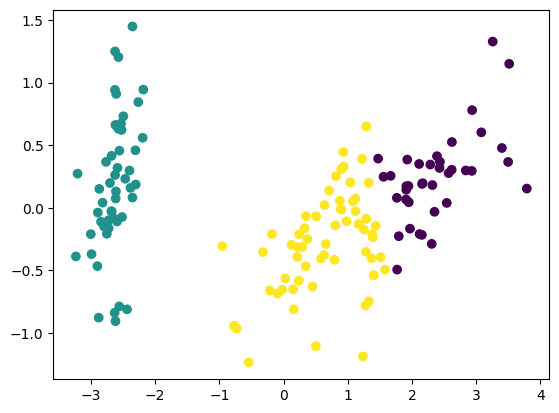

In [45]:
plt.scatter(x = sales['pca_x'], y = sales['pca_y'], c = sales['cluster'])
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [46]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)
sales_data.head(3)

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5


4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [47]:
#sales의 모든 데이터에 실루엣 계수 구하기
scores = silhouette_samples(sales_data,sales['cluster']) # X feature 데이터 세트와, 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 인자

In [48]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coef'] = scores
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster,silhouette_coef
0,5.0,0.2,3.0,1.6,1,0.791129
1,5.0,0.4,3.4,1.6,1,0.803393
2,5.2,0.2,3.5,1.5,1,0.807454


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [51]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(sales_data,sales['cluster'])
average_score

0.538044239952023

4-3) 군집별 평균 실루엣 계수를 구하세요.

In [53]:
#군집별 평균 실루엣 계수 구하기
sales.groupby(['cluster'])['silhouette_coef'].mean()

,silhouette_coef
cluster,
0,0.450677
1,0.755123
2,0.416528
